Here is the first Part =

Part 0 Initial
---------------------


Readi file into pandas datafrme

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import os
from sklearn import tree
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pydotplus
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
dicPath = os.getcwd()
dicPathClean = os.path.join(dicPath,'Crime Prediction Data','communities-crime-clean.csv')
dicPathDirty = os.path.join(dicPath,'Crime Prediction Data','communities-crime-full.csv')

In [2]:
df=pd.read_csv(dicPathClean)
dfd = pd.read_csv(dicPathDirty)
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

Over view for the data
Part I Explore world
-----------------

In [3]:
df.shape

(1993, 105)

In [4]:
dfd.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Here is gonna to explore the dirty data
# of example is the same, however, the columns aren't not => check which feature is missing

In [5]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)# so diffent set :) so convinenance

array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [6]:
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983,0.627195
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043,0.483672
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000,0.000000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000,1.000000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000,1.000000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()['ViolentCrimesPerPop'].abs().nlargest(5)

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
PctKids2Par            0.739231
PctFam2Par             0.707438
racePctWhite           0.685631
Name: ViolentCrimesPerPop, dtype: float64

Part II Crime community percentage?
-------------------------------------

In [8]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
print('High crime community is',pos_percentage,'%')

High crime community is 0.6271951831409934 %


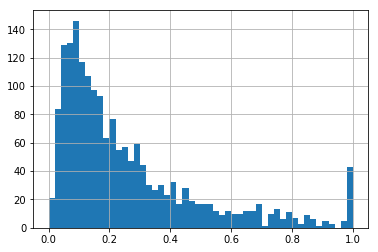

In [9]:
df['PctIlleg'].sample(n = 1800).hist(bins  = 50)

# 1. Decision Tree
-----------------
Strarting witn decision tree

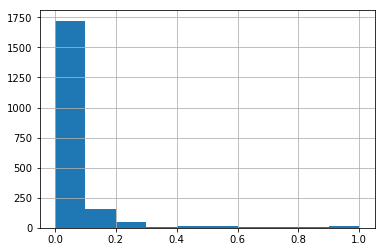

In [10]:
df.population.hist()

In [61]:
initial= df
initial = initial.drop('communityname', 1).drop('ViolentCrimesPerPop', 1).drop('fold', 1).drop('state', 1).drop('highCrime',1)
Y = df['highCrime']
dtclf = tree.DecisionTreeClassifier(max_depth= 3)
dtclf = dtclf.fit(initial, Y)

In [62]:
acc_scores = cross_val_score(dtclf, initial, Y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(dtclf, initial, Y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(dtclf, initial, Y, cv=10, scoring='recall').mean()

In [63]:
print(acc_scores);print(pre_scores);print(rec_scores);

0.722
0.784076712747
0.7736


# 2.Linear Classification
---------

a. GaussianNB:
----

### 2.i) 10 Fold CV:


In [14]:
X = df.drop('ViolentCrimesPerPop',1).drop('highCrime',1).drop('communityname',1)
y = df['highCrime']
gnb = GaussianNB([0,1])
acc_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(gnb, X, y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(gnb, X, y, cv=10, scoring='recall').mean()


print ('Accuracy is', acc_scores)
print ('Precision is', pre_scores)
print ('Recall is', rec_scores)

/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes

Accuracy is 0.627198492462
Precision is 0.627198492462
Recall is 1.0


/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py:427: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes

### ii ) 10 most predictive features:

#### Creating a dataframe with the response variable:

In [15]:
dfForPredictiveFeature = df.drop('communityname',1)
dfForPredictiveFeature['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [16]:
count = 0
dictPredFeat = {}
for column in dfForPredictiveFeature:
    meanTrue = dfForPredictiveFeature[dfForPredictiveFeature['highCrime'] == 1][column].mean()
    meanFalse = dfForPredictiveFeature[dfForPredictiveFeature['highCrime'] == 0][column].mean()
    varTrue = dfForPredictiveFeature[dfForPredictiveFeature['highCrime'] == 1][column].var()
    varFalse = dfForPredictiveFeature[dfForPredictiveFeature['highCrime'] == 0][column].var()
    if(column != 'highCrime'):
        predScore = abs((meanTrue - meanFalse))/(varFalse+varTrue)
        dictPredFeat[column] = predScore
# print(sorted(dictPredFeat.items(), key=lambda x: x[1]))
#     count = count+1

#### sort and print the last 10 features:

In [17]:
TopTenFeat = sorted(dictPredFeat.items(), key=lambda x: x[1])[-11:-1]
for i in TopTenFeat:
    print(i)
# print(count)

('racePctWhite', 3.4402715072040073)
('PctIlleg', 3.466925445469923)
('PctYoungKids2Par', 3.644782922632504)
('MalePctDivorce', 3.9465337329938555)
('PctTeen2Par', 3.9954561774196335)
('TotalPctDiv', 4.3812734118491115)
('pctWInvInc', 4.390239171514135)
('PctFam2Par', 4.5894616248835165)
('FemalePctDiv', 4.751737777973133)
('PctKids2Par', 4.996478183496772)


2.b) LinearSVC:
    --------

In [18]:
from sklearn import svm
svmclf = svm.SVC(kernel='linear', C =1.0)
acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', acc_scores)
print ('Precision is', pre_scores)
print ('Recall is', rec_scores)

Accuracy is 0.803788944724
Precision is 0.855059999264
Recall is 0.8432


#### 2.B) Absolute feature weights( ie the coefficients of the hyperplance vector)

In [19]:
svmclf.fit(X,y)
print(svmclf.coef_.shape)
print(svmclf.coef_)

(1, 102)
[[ -9.03886586e-03   1.53019946e-02   1.01324468e+00  -6.81465561e-01
    1.77366076e+00  -2.15004100e+00  -2.37875650e-01   6.65200014e-01
    1.04751257e+00  -8.46030712e-01   1.68807572e-01   6.46796968e-01
    6.94528369e-01   2.34577245e-01   1.07763706e-01  -5.03853638e-01
    1.87909860e-01  -2.50327341e+00   7.36774653e-02  -2.39927516e-01
    2.25437698e-01   1.22986118e-01   3.09621155e-01   3.49503457e-01
    3.99953600e-02   6.94227406e-02  -2.52867159e-01   5.62902571e-01
   -5.29207444e-01   7.47241951e-01  -1.39333010e-01  -2.75775408e-01
    2.55841610e-01  -2.61281612e-01   7.91953091e-02   3.93537156e-01
   -2.25345940e-01  -7.17816018e-01  -6.16798753e-01   8.42862020e-01
    1.18774499e+00   3.08436131e-01   1.03967043e-01   6.96517597e-01
   -1.09325001e-01  -1.42257275e+00  -2.03824150e+00  -8.06287127e-01
    4.84733489e-01   1.50259597e-02   7.80791654e-02   4.61844395e-01
    5.86233918e-01   8.23352501e-02   4.18656077e-01  -5.02358003e-01
   -1.33661

# 3.Regression
---------

In [20]:
Y = df['ViolentCrimesPerPop']

In [22]:
initial= df
initial = initial.drop('communityname', 1).drop('ViolentCrimesPerPop', 1).drop('fold', 1).drop('state', 1).drop('highCrime',1)
Y = df['highCrime']
scores = cross_val_score(lr_1, initial, Y,None,scoring='neg_mean_squared_error',cv=10)

## 3.a)I
----------------------------
Using 10-fold cross-validation, what is the estimated mean-
squared-error (MSE) of the model?

In [27]:
np.abs(scores.mean())

0.13111570033855097

## 3.a)II
--------------
What is the MSE on the training set

In [24]:
lr_1.fit(initial,Y)
print("Mean squared error: %.2f"
      % np.mean((lr_1.predict(initial) - Y) ** 2))

Mean squared error: 0.12


## 3.a)III What features are most predictive of a high crime rate? A low
crime rate?
-----------------


it’s easy to think that variables with larger coefficients are more important because they represent a larger change in the response. 
That's not always true.

Since the features scale has been standardized, we can pick highest and lowest coefficent for the most predictive value.

In [42]:
print('Coefficients: \n', lr_1.coef_)
ls_coef_lr1 = np.array(lr_1.coef_)
max_feature = np.where(ls_coef_lr1 == ls_coef_lr1.max())

Coefficients: 
 [ 0.18396339 -0.02231606  0.20493383 -0.04915604 -0.0144296   0.06087618
  0.11035749 -0.22921784 -0.13016221  0.04974446 -0.29644254  0.04670138
 -0.19982858 -0.20157396  0.04875141 -0.1731211   0.0761747   0.00495907
 -0.09000184  0.28797887  0.09551562 -0.35101577 -0.02875531 -0.03571694
  0.02164703  0.04380689  0.03572849  0.11115737 -0.17214385 -0.09991658
  0.05254806  0.05038826  0.00454329  0.24847432 -0.06583291 -0.02673461
  0.07234625  0.12263071  0.45851705  0.22672791  0.16273332 -0.56192431
 -0.14049326  0.01859592 -0.32265128 -0.03230383 -0.00294581  0.05915826
 -0.18611198 -0.13768061  0.1215016  -0.14411742  0.02206421  0.03594264
 -0.07777426  0.03363794 -0.02533207 -0.21822101  0.43251056 -0.18125139
 -0.02538104 -0.15180678  0.04530161 -0.19910488  0.63508812 -0.07049674
 -0.25457166 -0.67569448  0.21435256  0.1025989   0.03042671  0.15874822
 -0.04808195  0.56813321  0.04924214 -0.07892199 -0.02576789  0.00316608
 -0.01404768 -0.30817022  0.2128758

Most predictive toward high crime is 'PersPerOccupHous'

In [43]:
initial.columns[np.argmax(ls_coef_lr1)]

'PersPerOccupHous'

Most predictive toward low crime : 'PctPersOwnOccup'

In [44]:
initial.columns[np.argmin(ls_coef_lr1)]

'PctPersOwnOccup'

Ridge Regression
------------------

In [45]:
param_range = np.logspace(-1, 3, 10)
train_scores, test_scores = validation_curve(
    linear_model.Ridge (), initial, Y, param_name="alpha", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

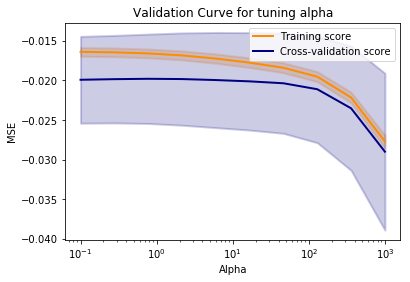

In [46]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [42]:
lrr = linear_model.Ridge(alpha = 0.1)

In [43]:
lrr.fit(initial,Y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(initial) - Y) ** 2))

Mean squared error: 0.12


polynomial features
--------

In [45]:
poly = PolynomialFeatures(degree  = 2,interaction_only = True)
poly_init = poly.fit_transform(initial)

param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(
    PolynomialFeatures(), initial, Y, param_name="degree", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)

Crete polynomial feature

In [46]:
lrr.fit(poly_init,Y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(poly_init) - Y) ** 2))

Mean squared error: 0.03


In [48]:
df_poly = pd.DataFrame(poly_init)

In [49]:
initial.shape

(1993, 100)

In [50]:
poly_init.shape

(1993, 5051)

In [57]:
scores = cross_val_score(lr_1, poly_init, Y,None,scoring='mean_squared_error',cv=10,n_jobs = -1)

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metri

In [55]:
scores

array([-0.99398953, -1.38322121, -1.40367924, -0.88322653, -0.77381705,
       -1.58059651, -0.72971341, -0.79708488, -1.63312237, -0.976979  ])

In [56]:
print(scores.mean())

-1.11554297287


# 4.Dirty Data
---------

In [129]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)# so diffent set :) so convinenance


array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [130]:
dfd = pd.read_csv(dicPathDirty)

There 2 Way to replace ? mark. 1. replace  2. appmap
1.

In [131]:
dfd_clean = dfd.replace('?',np.nan)

In [132]:
y_train = dfd.ViolentCrimesPerPop
del dfd_clean['communityname']
del dfd_clean['county']
del dfd_clean['community']
del dfd_clean['ViolentCrimesPerPop']

In [133]:
dfd_clean.shape

(1994, 124)

In [134]:
imputer = Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)

In [135]:
dfd_clean = imputer.fit_transform(dfd_clean)
dfd_clean = pd.DataFrame(dfd_clean)

In [136]:
lr_1 = LinearRegression()
scores = cross_val_score(lr_1, dfd_clean,y_train,None,scoring='neg_mean_squared_error',cv=10)

In [137]:
dfd.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

# 5. TEAM WORK
---------

## RadomForeset
--------------------------

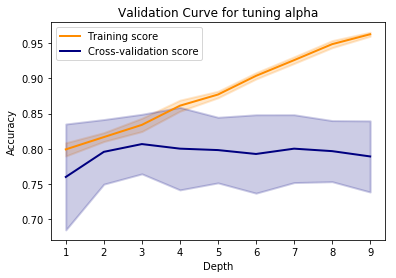

In [117]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",
#             color="darkorange", lw=lw)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [105]:
rf_clf = RandomForestClassifier(random_state=100, max_depth=3)

acc_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='recall').mean()

In [106]:
print ('Accuracy is', acc_scores)
print ('Precision is', pre_scores)
print ('Recall is', rec_scores)

Accuracy is 0.795751256281
Precision is 0.817422726438
Recall is 0.8808


In [109]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Nonlinear SVM
---------------------

Fine tuning Panelty coefficient => We pick C = 46

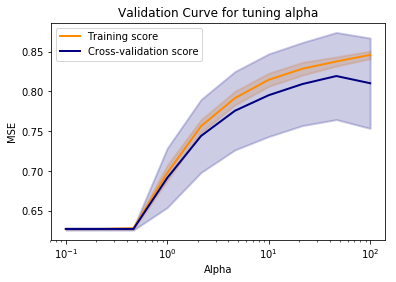

In [125]:
param_range = np.logspace(-1, 2, 10)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='poly'), initial, Y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [126]:
test_scores_mean

array([ 0.62719849,  0.62719849,  0.62719849,  0.69139698,  0.74406281,
        0.77566332,  0.79523116,  0.80928894,  0.81932412,  0.81029397])

In [127]:
param_range

array([   0.1       ,    0.21544347,    0.46415888,    1.        ,
          2.15443469,    4.64158883,   10.        ,   21.5443469 ,
         46.41588834,  100.        ])

In [128]:
svmclf = svm.SVC(kernel='poly', C =46)
acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', acc_scores)
print ('Precision is', pre_scores)
print ('Recall is', rec_scores)

Accuracy is 0.740113065327
Precision is 0.80606778382
Recall is 0.7992


# Extra Credit: K-Means
---------

In [138]:
from sklearn.cluster import KMeans
kmClf = KMeans(n_clusters = 2)
acc_scores = cross_val_score(kmClf, X, y, cv=10, scoring='accuracy').mean()

print ('Accuracy is', acc_scores)


Accuracy is 0.458286432161


# Comparasion 
------------------------------


## Classification
----------------------------

In Classification , we apply:
a)Decision Tree
b)Random forest
c)LinearSVC
d)Polynomial kernal SVM
e)K-mean

## Regession
------------------------
a)Linear Regression
b)Polynomial Regression